<a href="https://colab.research.google.com/github/skredenmathias/DS-Unit-2-Linear-Models/blob/master/module2_regression_2/assignment_regression_classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import numpy as np
import pandas as pd

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

# Explore

In [0]:
df.columns

In [4]:
df.shape

(48817, 34)

In [0]:
cats_allowed = (df['cats_allowed'] == 1) 
dogs_allowed = (df['dogs_allowed'] == 1)

In [0]:
# df = df[df[cats]]

# Making new features

In [0]:
total_rooms = df['bathrooms'] + df['bedrooms']

In [0]:
total_rooms

In [0]:
ratio_rooms = df['bedrooms'] // df['bathrooms']

In [0]:
ratio_rooms

In [0]:
# ratio_rooms = ratio_rooms.dropna()

In [12]:
ratio_rooms.isna().sum()

151

In [0]:
# Clean NaN values
df.isna().sum()

In [0]:
df['ratio_rooms'] = ratio_rooms
# df['ratio_rooms'] = ratio_rooms.notnull() # Look at this bad boy eh

In [0]:
df['ratio_rooms'] = df['ratio_rooms'].replace(np.inf, np.nan)

In [0]:
df = df.dropna(subset=['ratio_rooms'])

In [0]:
# df['ratio_rooms'] = df['ratio_rooms'].dropna()

In [18]:
df['ratio_rooms'].isna().sum() # Why is it not working?

0

In [0]:
# df['ratio_rooms'].dropna(inplace=True)

In [0]:
df['total_rooms'] = total_rooms


In [21]:
df['ratio_rooms'].isna().sum()

0

In [0]:
df.head()

In [0]:
df.isna().sum()

# Fixing DateTime + make numeric

In [24]:
df['created'].head()

0    2016-06-24 07:54:24
1    2016-06-12 12:19:27
2    2016-04-17 03:26:41
3    2016-04-18 02:22:02
4    2016-04-28 01:32:41
Name: created, dtype: object

In [0]:
df['created'] = pd.to_datetime(df['created'])

In [26]:
df['created'].head()

0   2016-06-24 07:54:24
1   2016-06-12 12:19:27
2   2016-04-17 03:26:41
3   2016-04-18 02:22:02
4   2016-04-28 01:32:41
Name: created, dtype: datetime64[ns]

In [34]:
# Making dates numeric
train['created'] = train['created'].dt.month
test['created'] = test['created'].dt.month

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Make test / train split + baseline

In [27]:
train = df[(df['created'] > '2016-04-01') & (df['created'] <= '2016-05-31')]
train.shape

(31648, 36)

In [28]:
test = df[(df['created'] >= '2016-06-01') & (df['created'] <= '2016-06-30')]
test.shape

(16860, 36)

In [29]:
# Baseline
train['price'].mean()

3576.96062942366

In [0]:
# Arrange y target vectors
target = 'price'
y_train = train[target]
y_test = test[target]

In [31]:
# Get mean baseline
print('Mean Baseline(using 0 features)')
guess = y_train.mean()

Mean Baseline(using 0 features)


In [32]:
# Train Error
from sklearn.metrics import mean_absolute_error
y_pred = [guess] * len(y_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error (April & May): ${mae:.2f}')

Train Error (April & May): $1201.70


In [33]:
# Test Error
y_pred = [guess] * len(y_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error (June): ${mae:.2f}')

Test Error (June): $1197.63


In [0]:
### Graph here

# Regression with 1 feature

In [0]:
# Import appropriate estimator class
from sklearn.linear_model import LinearRegression

In [0]:
# 2. Instantiate
model = LinearRegression()

In [38]:
# 3. Arrange X features (y completed)
features = ['created']
X_train = train[features]
X_test = test[features]
print(f'Linear Regression, dependent on: {features}')

Linear Regression, dependent on: ['created']


In [39]:
# 4. Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error: ${mae:.2f}')

Train Error: $1201.33


In [40]:
# 5. Apply the model to new data
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error: ${mae:.2f}')

Test Error: $1227.03


# Multiple features

In [41]:
# Multiple features, re-arrange X features matrices
features = ['total_rooms',
            'ratio_rooms']
print(f'Linear Regression, dependent on: {features}')

X_train = train[features]
X_test = test[features]

Linear Regression, dependent on: ['total_rooms', 'ratio_rooms']


In [42]:
# Fit the model
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred)
print(f'Train Error: ${mae:.2f}')

Train Error: $825.32


In [43]:
# Apply the model to new data
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Error: ${mae:.2f}')

Test Error: $832.60


 # Get the model's coefficients and intercept.

In [44]:
model.intercept_, model.coef_

(1479.8174570684287, array([1064.8673105 , -676.34361435]))

In [45]:
# Easier to read
print('Intercept', model.intercept_)
coefficients = pd.Series(model.coef_, features)
print(coefficients.to_string()) # So the less bathrooms (denominator) to
# bedrooms, the less the apt is worth?

Intercept 1479.8174570684287
total_rooms    1064.867311
ratio_rooms    -676.343614


## Get regression metrics RMSE, MAE, and  R2 , for both the train and test data.

In [0]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def squared_errors(df, feature, target, m, b):
    """
    Visualize linear regression, with squared errors,
    in 2D: 1 feature + 1 target.
    
    Use the m & b parameters to "fit the model" manually.
    
    df : Pandas DataFrame
    feature : string, feature column in df
    target : string, target column in df
    m : numeric, slope for linear equation
    b : numeric, intercept for linear requation
    """
    
    # Plot data
    fig = plt.figure(figsize=(7,7))
    ax = plt.axes()
    df.plot.scatter(feature, target, ax=ax)
    
    # Make predictions
    x = df[feature]
    y = df[target]
    y_pred = m*x + b
    
    # Plot predictions
    ax.plot(x, y_pred)
    
    # Plot squared errors
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    scale = (xmax-xmin)/(ymax-ymin)
    for x, y1, y2 in zip(x, y, y_pred):
        bottom_left = (x, min(y1, y2))
        height = abs(y1 - y2)
        width = height * scale
        ax.add_patch(Rectangle(xy=bottom_left, width=width, height=height, alpha=0.1))
    
    # Print regression metrics
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print('Mean Squared Error:', mse)
    print('Root Mean Squared Error:', rmse)
    print('Mean Absolute Error:', mae)
    print('R^2:', r2)

ValueError: ignored

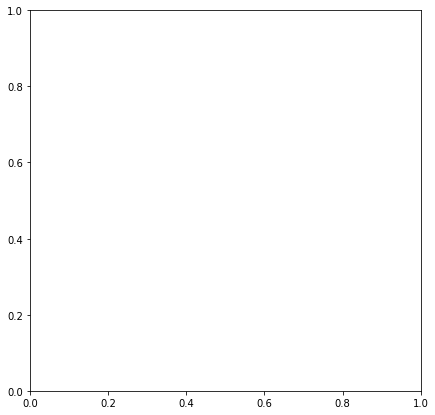

In [55]:
squared_errors(train, features, target, m=816.57, b=2932.41)

In [51]:
target

'price'